## [연습] 2022년 대통령 신년사 형태소 분석

In [1]:
from konlpy.tag import Okt
from nltk import Text
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

import warnings
warnings.simplefilter('ignore')

### 1. 파일 읽어오기

In [2]:
f = open("./2022_newyear.txt")
texts = f.read()
f.close()

In [3]:
texts[:50]

'존경하는 국민 여러분,\n\n2022년, 새해의 출발선에 다시 섰습니다. 격동하는 세계사의 한'

2. 읽어온 데이터를 이용해 형태소 단위로 분류하기
- 명사/동사/형용사 추출

In [4]:
okt = Okt()
okt.morphs(texts)  # 단어단위로 분류하기
pos_txt = okt.pos(texts)

Nouns = [ t[0] for t in pos_txt if t[1] == "Noun" ]
Adjs = [ t[0] for t in pos_txt if t[1] == "Adjective" ]
Verbs = [ t[0] for t in pos_txt if t[1] == "Verb" ]

print(Nouns[:5])
print(Adjs[:5])
print(Verbs[:5])

['존경', '국민', '여러분', '새해', '출발']
['굳건', '힘찬', '있는', '계신', '빠른']
['하는', '섰습니다', '하는', '맞습니다', '받아']


3. 분류한 데이터 하나로 합친 후 Text를 이용해 NLTK.text로 만들기

In [5]:
morph = Nouns + Adjs + Verbs
print(morph[:10])
morph_T = Text(morph)
morph_T

['존경', '국민', '여러분', '새해', '출발', '선', '다시', '격동', '세계사', '복판']


<Text: 존경 국민 여러분 새해 출발 선 다시 격동...>

4. 토큰(단어) 빈도수 그래프로 출력하기

In [6]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'AppleGothic')

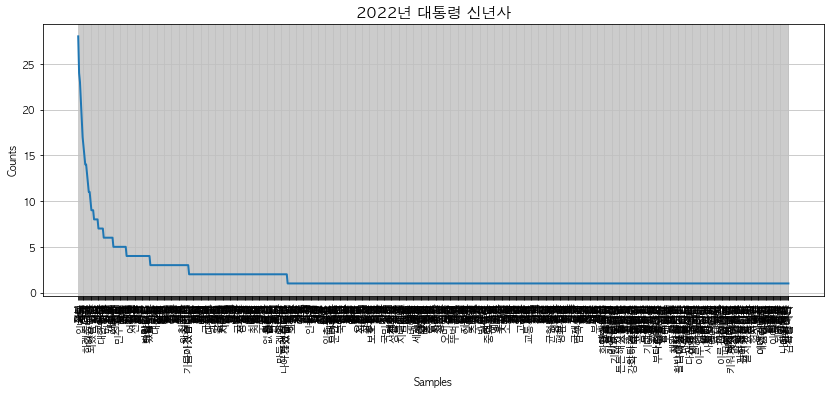

In [7]:
plt.figure(figsize=(14, 5))
plt.title("2022년 대통령 신년사", size=15)
morph_T.plot()
plt.show()

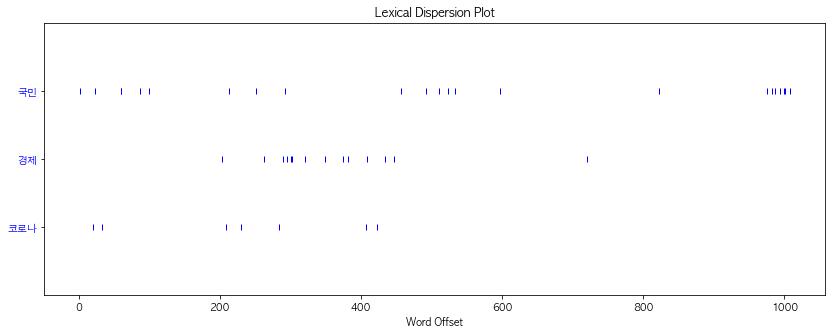

In [8]:
plt.figure(figsize=(14, 5))
morph_T.dispersion_plot(["국민", '경제', "코로나"])   # 단어 위치 확인
plt.show()

### 빈도수 계산 및 워드클라우드 작성

#### 불용어(Stopwords) 처리
- 영문 사전: 영문은 기본 제공
- 한글 사전: 개인적으로 만들어야 함
- 사전 참조: https://www.ranks.nl/stopwords

In [9]:
# 시용자 stop_words 만들기 (한글인 경우 꼭 필요)
stop_words = ". 섰습니다 맞습니다 있습니다 하겠습니다 수 할 위 해 등 ? 출발 선 다시 입니다 더욱 더 되고"
stop_words = stop_words.split(" ")
print(stop_words)

['.', '섰습니다', '맞습니다', '있습니다', '하겠습니다', '수', '할', '위', '해', '등', '?', '출발', '선', '다시', '입니다', '더욱', '더', '되고']


In [10]:
# stopword 적용하기
# morph_sw = []
# for sw in morph:
#     if sw not in stop_words:
#         morph_sw.append(sw)
morph_sw = [ sw for sw in morph if sw not in stop_words]
print(morph[:10])
print(morph_sw[:10])

['존경', '국민', '여러분', '새해', '출발', '선', '다시', '격동', '세계사', '복판']
['존경', '국민', '여러분', '새해', '격동', '세계사', '복판', '우리', '희망', '새해']


### 빈도수에 의한 워드클라우드 출력

In [11]:
morph_cnt = Counter(morph_sw) # 리트에 입력된 데이터의 빈도수 계산
morph_cnt # 딕셔너리 구조: {단어:빈도수, 단어:빈도수, ...}

Counter({'존경': 4,
         '국민': 23,
         '여러분': 5,
         '새해': 4,
         '격동': 1,
         '세계사': 1,
         '복판': 1,
         '우리': 24,
         '희망': 4,
         '호랑이': 1,
         '기운': 1,
         '복': 1,
         '도약': 6,
         '코로나': 7,
         '기간': 2,
         '어려움': 4,
         '위로': 3,
         '격려': 1,
         '말씀': 2,
         '병상': 2,
         '분': 3,
         '쾌유': 1,
         '기원': 1,
         '세상': 1,
         '사랑': 1,
         '가족': 1,
         '애도': 1,
         '마음': 3,
         '전': 4,
         '지금': 5,
         '이': 2,
         '시간': 2,
         '추위': 1,
         '속': 7,
         '방역': 6,
         '진과': 1,
         '의료': 3,
         '진': 1,
         '분투': 1,
         '거듭': 2,
         '감사': 3,
         '지난': 5,
         '임기': 5,
         '동안': 2,
         '정부': 28,
         '숱': 1,
         '위기': 11,
         '새': 1,
         '도전': 2,
         '길이': 5,
         '전진': 2,
         '정사': 1,
         '초유': 1,
         '대통령': 3,
         '탄핵': 1,
        

In [12]:
morph_txt = morph_cnt.most_common() # 딕셔너리형 자료를 튜플구조로 만들어 리스트형으로 제공
morph_txt[:10]

[('정부', 28),
 ('우리', 24),
 ('국민', 23),
 ('세계', 19),
 ('하는', 17),
 ('것', 16),
 ('국가', 15),
 ('경제', 14),
 ('위기', 11),
 ('평화', 10)]

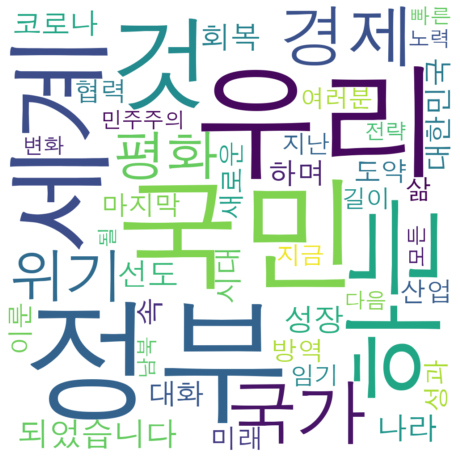

In [13]:
## 빈도수가 낮은 데이터(빈도수 5 미만인 데이터) 제거
morph_txt_up = [tc for tc in morph_txt if tc[1] >= 5]

# 워드클라우드 작업을 위한 딕셔너리(튜플 = > 딕셔너리) 구조 변경
morph_txt_up = dict(morph_txt_up)

## 워드클라우드 출력
# font_path = '../'
wordcloud = WordCloud(font_path = 'AppleGothic',
                     background_color = 'white',
                     width = 1000, height = 1000,
                     max_words=100, max_font_size = 300)

wc = wordcloud.generate_from_frequencies(morph_txt_up)

plt.figure(figsize = (8,15))
plt.imshow(wc)
plt.imshow(wc, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [14]:
import pandas as pd

# 빈도수가 5 이상인 데이터를 이용해 DataFrame로 출력


morph_txt_tu = [tc for tc in morph_txt if tc[1] >= 5]
df = pd.DataFrame(morph_txt_tu, columns = ['단어', '빈도수'])
df

,단어,빈도수
0,정부,28
1,우리,24
2,국민,23
3,세계,19
4,하는,17
5,것,16
6,국가,15
7,경제,14
8,위기,11
9,평화,10


In [15]:
f =open("./2022_newyear.txt",'r',encoding='utf-8')
news = f.read()

#okt 객체 생성
okt = Okt()
noun = okt.nouns(news)
# count = Counter(noun)

In [16]:
enumerate(noun)

In [17]:
# 한글자 인거 빼기
for i,v in enumerate(noun):
    print(i, v)
    if len(v)<2:
        noun.pop(i)

count = Counter(noun)

# 명사 빈도 카운트
noun_list = count.most_common(100) #빈도가 높은 n개의 명사를 추출해준다
for v in noun_list:
    print(v)

0 존경
1 국민
2 여러분
3 새해
4 출발
5 선
6 격동
7 세계사
8 복판
9 우리
10 희망
11 새해
12 호랑이
13 기운
14 새해
15 복
16 도약
17 해
18 기간
19 어려움
20 국민
21 여러분
22 위로
23 격려
24 말씀
25 병상
26 분
27 기원
28 코로나
29 세상
30 분
31 가족
32 분
33 마음
34 전
35 이
36 추위
37 속
38 진과
39 의료
40 진
41 거듭
42 존경
43 감사
44 마음
45 지난
46 임기
47 동안
48 정부
49 국민
50 국민
51 숱
52 새
53 길이
54 길이
55 전진
56 정사
57 초유
58 대통령
59 탄핵
60 국면
61 인수위
62 출범
63 우리
64 정부
65 정
66 바로
67 민주주의
68 진전
69 권력
70 기관
71 더
72 국민
73 위
74 견제
75 균형
76 원리
77 작동
78 권력
79 기관
80 개혁
81 제도
82 권력
83 벽
84 참여
85 더욱
86 투명
87 성과
88 개방
89 확대
90 사회
91 언론
92 자유
93 인권
94 신장
95 나라
96 세계
97 인정
98 민주주의
99 국가
100 대열
101 합류
102 더욱
103 민주주의
104 출범
105 당시
106 일촉즉발
107 전쟁
108 위기
109 상황
110 속
111 물꼬
112 트
113 길
114 평화
115 때로는
116 긴장
117 조성
118 기도
119 한반도
120 상황
121 때
122 관리
123 분단국가
124 전쟁
125 우리
126 평화
127 가치
128 평화
129 번영
130 위
131 전제
132 평화
133 제도
134 마지막
135 최선
136 우리
137 남북
138 대화
139 북미
140 대화
141 지금
142 평화
143 지탱
144 사실
145 안
146 안보
147 위
148 정부
149 대화
150 역대
151 정부
152 국방력
153 그
154 종합
155 군사력
156 세계
157 위로
158 평